# Polytech SI3 - Données numériques
Diane Lingrand

Diane.Lingrand@univ-cotedazur.fr

2022-2023

# Cours 3 - kNN

In [1]:
#chargement des librairies
import numpy as np
import matplotlib.pyplot as plt
import pickle

## kNN in dimension 2

### simple synthetic data for debuging

We will start with few data (2d points) arranged in a regular grid and two classes: 0 and 1.

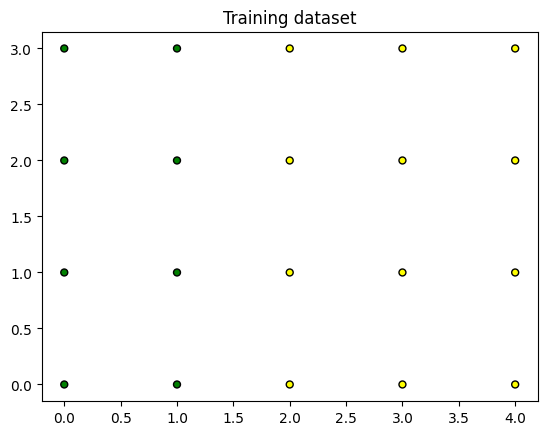

In [2]:
nbClasses = 2
# the 2d points
Xtrain =np.mgrid[0:4.1:1, 0:3.1:1].reshape(2,-1).T
# the classes
yTrain = [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1] # classe de chaque élément
# the vector of colors for drawing purpose
colors = np.array(["green","yellow", "black"])
# let draw the points using colored circles with black edges
plt.title("Training dataset")
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], marker="o", c=colors[yTrain], s=25, edgecolor="k")

Set a variable 'kNN' to the number of neighbors you would like to consider (start with 5). A new point will be denoted by 'newX'.

In [3]:
newX = [0.5,1] # ceci est un point
nKNN = 5 # ceci est le nombre de voisins qu'on va considérer lors de nos études

**Question 1:** Compute all Euclidean distances between this new point and all points in the training dataset. You will need [numpy.sum](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) and [numpy.sqrt](https://numpy.org/doc/stable/reference/generated/numpy.sqrt.html) functions.

In [9]:
#list of all distances
# your work here
distance = []
for pointX in Xtrain:
    distance.append(np.sqrt(np.power(pointX[0] - newX[0], 2) + np.power(pointX[1] - newX[1], 2)))
#distance = np.sqrt(np.sum(np.power(Xtrain - newX,2), axis=1))
print(distance)
# pour améliorer les performances, on peut aussi afficher juste après le append dans la boucle.

[1.118033988749895, 0.5, 1.118033988749895, 2.0615528128088303, 1.118033988749895, 0.5, 1.118033988749895, 2.0615528128088303, 1.8027756377319946, 1.5, 1.8027756377319946, 2.5, 2.692582403567252, 2.5, 2.692582403567252, 3.2015621187164243, 3.640054944640259, 3.5, 3.640054944640259, 4.031128874149275]


Ici, on utilise simplement la formule mathématique :
$racine((x1-x2)^2  + (y1-y2)^2))$ qui sert à calculer la distance entre les points A (x1, y1) et B (x2, y2).
Dans l'exercice, on calcule la distance entre chaque point contenu dans Xtrain et le point qu'on décide d'étudier : newX.

Xtrain[i][0] signifie qu'on récupère l'élément d'indice i dans le tableau Xtrain. Or l'élément i est lui-même un tableau qui contient deux coordoonnées x et y (il s'agit donc d'un point) de la façon suivante : [x, y]
En faisant Xtrain[i][0], je récupère donc l'abscisse de ce point.
En faisant Xtrain[i][1], j'en récupère l'ordonnée.

Ce qui donne donc des calculs du type :  $racine((Xtrain[0][0]-newX[0])^2  + (Xtrain[0][1]-newX[1])^2))$, et ainsi de suite, pour les N éléments du tableau Xtrain.

**Question 2:** Sort the distances and build an array of indices of training points using [numpy.argsort](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html)

In [12]:
# your work here
res = np.argsort(distance)
print(res)

[ 1  5  0  2  6  4  9  8 10  7  3 11 13 12 14 15 17 18 16 19]


Dans cet exercice, argsort renvoie simplement les indices des éléments contenus dans le tableau distance s'ils étaient triés.
Autrement dit, le premier élément est l'élément d'indice 1, donc on sait alors que si on triait le tableau distance, le premier element serait l'élément d'indice 1, à savoir la valeur 0.5.
Le deuxième élément du tableau trié serait alors le cinquième élément du tableau distance (pas trié), etc.

**Question 3:** Take the indices of 'nKNN' smallest distances. Build an array 'Xn' of the training points at these indices and 'yn' for the corresponding classes.

In [25]:
# nKNN smallest distances indices
nei = res[0:nKNN]

# nKNN closest data
Xn = []
yn = []
for i in nei:
    Xn.append(Xtrain[i])
    yn.append(yTrain[i])
Xn = np.array(Xn)
print(nei)
print(Xn)
print(yn)

[1 5 0 2 6]
[[0. 1.]
 [1. 1.]
 [0. 0.]
 [0. 2.]
 [1. 2.]]
[0, 0, 0, 0, 0]


```python
nei = res[0:nKNN]
```
Ce code permet de récupérer les nKNN premiers éléments du tableau "res", et de stocker le résultat dans nei.
Autrement dit, ce code récupère en fait ici les 5 premiers indices des éléments si le tableau distance était trié.

Par la suite, on parcourt ces indices, et on récupère les éléments de Xtrain qui ont permis d'obtenir les éléments du tableau distance qui ont ces indices.
On rappelle :
- Xtrain -> contient des points
- newX -> point étudié
- distance -> tableau contenant la distance entre chaque élément de Xtrain et newX
- res -> tableau contenant les indices des éléments du tableau "distance" s'il était trié
- nei -> tableau contenant les indices des nKNN premiers éléments du tableau "res"

```python
for i in nei:
    Xn.append(Xtrain[i])
```

Ce code permet alors de récupérer les points du tableau Xtrain qui ont permis d'obtenir les nKNN plus petites distances
par rapport au point newX.

Car ici, le but est de trouver les nKNN voisins les plus proches du point qu'on étudie. Les points les plus proches sont ceux qui ont la distance la plus courte par rapport au point étudié.


```python
for i in nei:
    yn.append(yTrain[i])
```

Ce code permet de récupérer les classes (la nature) des points récupérés dans Xtrain juste au dessus.
L'élément d'indice 0 de yTrain correspond à l'élément d'indice 0 de Xtrain.


 **Question 4:** Using 'yn' compute the majority vote. Don't consider ambiguity now. [numpy.unique](https://numpy.org/doc/stable/reference/generated/numpy.unique.html) and [numpy.argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) will be useful.

In [ ]:
# majority vote for the class

# your work here

print("classe = ", classe)

**Question 4bis:** The same but highlight the ambiguity by assigning the classe 'nbClasses' 

In [ ]:
# majority vote for the class

#your work here

print("classe = ", classe)

**Question 5:** Plot the training dataset as before. In addition, plot the neighbors point using size 100 instead of 25. Plot the new point using '.' marker, in red. Play with the parameter k and the position of this new point.
    

[1.11803399 0.5        1.11803399 2.06155281 1.11803399 0.5
 1.11803399 2.06155281 1.80277564 1.5        1.80277564 2.5
 2.6925824  2.5        2.6925824  3.20156212 3.64005494 3.5
 3.64005494 4.03112887]
[ 1  5  0  2  6  4  9  8 10  7  3 11 13 12 14 15 17 18 16 19]
[1 5 0 2 6]
[0 0 0 0 0]
[5]
classe =  0


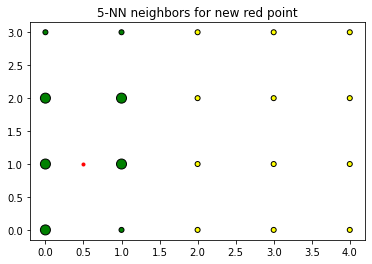

In [199]:
thetitle = str(nKNN)+"-NN neighbors for new red point"
plt.title(thetitle)

# your work here

**Question 6:** Put everything in the next function and return the class.

In [238]:
def voteKnn(xtrain, ytrain, nKnn, newData):
    
    # your work here
    
    return classe


**Question 6bis:** Test this function on the previous new point.

In [201]:
# your work here

1


**Question 7:** Compute the class of all the points on a higher resolution grid and plot the result (new points will be plotted with a marker '.'). Do you agree with the results?

(378, 2)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2
 2 2 0 2 2 2 2 0 2 2 2 2 0 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2
 2 1 2 2 2 2 1 2 2 2 2 2 2 1 1 2 2 2 2 1 2 2 2 2 1 2 2 2 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1]


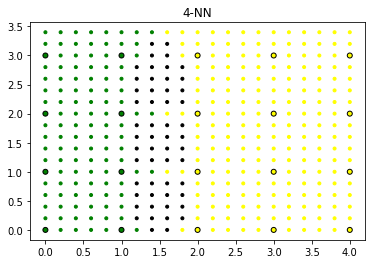

In [239]:
xTest=np.mgrid[0:4.2:0.2, 0:3.6:0.2].reshape(2,-1).T
print(xTest.shape)

thetitle = str(nKNN)+'-NN'
plt.title(thetitle)

# your work here

### more complex synthetic data

In this part, you will load another dataset. You first need to download this file: http://www.i3s.unice.fr/~lingrand/si3/datasetRandom.pickle and then run the next cell.

In [43]:
with open('datasetRandom.pickle', 'rb') as input:
    Xd, yd = pickle.load(input)


**Question 8:** Plot the dataset.

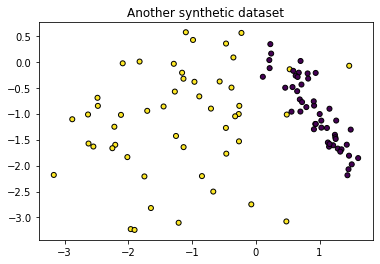

In [227]:
# your work here

In [216]:
# use the first 60% for the training and the last 40% for the test
Xtrain = Xd[:60]
yTrain = yd[:60]
Xtest = Xd[60:]
yTest = yd[60:]

**Question 9:** Compute the label of the test set from the values of the training set. Plot the training set using round markers with black edge and plot the testing set without the black edge and using the predicted colors. If true class (yTest) and the predicted class do not match, add a red edge.

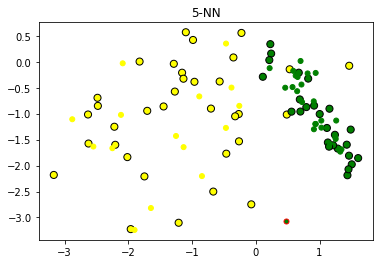

In [228]:
# your work here

**Question 10:**: Could you build a numerical metric for the classification evaluation?

In [ ]:
# your work

## multi-class kNN (dimension 2)

**Question 11:** Same questions using more than 2 classes. Be careful of the tables of colors.

In [ ]:
# your work

## multi-class kNN in any dimension (>2)

The difficulty with this part is that you can no long plot the data ...

**Question 12:** Same questions (except plottings) using more than 2 dimensions.

In [ ]:
# your work

## kdTree

If you reach this part, you are skilled enough to also implement the kd-tree! Start with 2d data.